# Hessian Matrix

We are going to implement a solver for optimisation problems using Hessian matrices.
We will use the two functions that we have also studied analytically.

## Importation of libraries

We use the *SymPy* library to compute and display our function. 

In [1]:
import pandas as pd
import numpy as np
import re
from sympy import *
import math

In [2]:
# Showing how to extract symbols
x, y, z = symbols('x, y, z')
multivar_exp = eval('z + y + x')
print(multivar_exp.free_symbols)

one, two, three = symbols('x_1 x_2 x_3')
multivar_exp = eval('three + two + one')
print('Free symbols:', multivar_exp.free_symbols)

# Showing how indices are rendered
print('Rendering the expression:', multivar_exp)

{z, y, x}
Free symbols: {x_1, x_3, x_2}
Rendering the expression: x_1 + x_2 + x_3


In [3]:
# Fixing ugly printing
init_printing()
display('Pretty rendering with display():', multivar_exp)

'Pretty rendering with display():'

## Implementation of functions

Here we implement few functions to calculate what we need to perform the optimization problem with the Hessian Matrix.

In [4]:
def evaluate_value(func, symbol_list, point):
    """
    Takes point tuple for evaluation, with variables in alphabetical order.
    fails if all symbols aren't mapped, returns numerical evaluation
    """
    if len(symbol_list) != len(point):
        print(symbol_list)
        print(point)
        raise ValueError('Unmatched argument sizes')
    result = func.copy()
    for symbol, value in zip(symbol_list, point):
        result = result.subs(symbol, value)
    return result

x = Symbol('x')
y = Symbol('y')
example_func = eval('exp(x-y)*(x**2-2*y**2+4*x+2)')
syms = list(example_func.free_symbols)
display(example_func, syms, ' with (-4, -2):')
display(evaluate_value(example_func, syms, (-4, -2)))
        

' with (-4, -2):'

In [5]:
def gradient(func, symbol_list):
    """ Returns list of derivatives for each free symbol (in alphabetical order) """
    partial_derivatives = []
    for symbol in symbol_list:
        partial_derivatives.append(diff(func, symbol))
    return partial_derivatives

x1, x2 = symbols('x y')
example_func = eval('exp(x-y)*(x**2-2*y**2)')
print('Gradient example using:')
display(example_func)
print('All partial derivatives:')
display(gradient(example_func, example_func.free_symbols))

Gradient example using:


All partial derivatives:


In [6]:
def calcul_hessian_matrix(func):
    """
    Calculate the hessian matrix of the function.
    """
    syms = func.free_symbols
    partial_derivates = gradient(func, syms)
    partial_derivates_second = []

    for derivate in partial_derivates:
        partial_derivates_second.append(factor(gradient(derivate, syms)))
    hessian_matrix = Matrix(partial_derivates_second)
    return hessian_matrix

In [7]:
def calculate_determinant(func, point):
    """
    Calculate the determinant based on the hessian matrix of the function.
    """
    syms = func.free_symbols
    return evaluate_value(calcul_hessian_matrix(func), syms, point).det()

In [8]:
def calculate_trace(func, point):
    """
    Calculate the trace based on the hessian matrix of the function.
    """
    hessian = calcul_hessian_matrix(func)
    syms = func.free_symbols
    eigenvals = evaluate_value(hessian, syms, point).eigenvals()
    # Trace definition, multiplying for multiplicity
    trace = sum([k*v for k, v in eigenvals.items()])
    return trace.simplify()

In [9]:
def is_critical_point(func, point):
    hessian = calcul_hessian_matrix(func)
    if calculate_determinant(func, point) > 0:
        trace = calculate_trace(func, point)
        if trace > 0 :
            return 'The function has a minimum.'
        elif trace < 0:
            return  'The function has a maximum.'
    return 'The function has no minimum or maximum.'

In [10]:
x = Symbol('x')
y = Symbol('y')
example_func_1 = eval('exp(x-y)*(x**2-2*y**2)')
example_func_2 = eval('x**2-cos(y)')
print('Gradient example using:')



# Case study maximum
display(example_func_1)
print(is_critical_point(example_func_1, (-4,-2)), (-4, -2))
print(is_critical_point(example_func_1, (0, 0)), (0, 0))
print()
display(example_func_2)
print(is_critical_point(example_func_2, (0, math.pi)), (0, math.pi))

print(is_critical_point(example_func_2, (0, 2*math.pi)), (0, 2*math.pi))

Gradient example using:


The function has no minimum or maximum. (-4, -2)
The function has no minimum or maximum. (0, 0)



The function has a minimum. (0, 3.141592653589793)
The function has a minimum. (0, 6.283185307179586)


## Gradient Descent

We implement the Gradient Descent to find if there is any critical points and if there is we applied previous functions define before.  
Then we determine if the critical point is either a minimum or a maximum based on the parameter **minimize** of our function.

If it's true, then we are looking for a minimum point and if it is false, we are looking for a maximum

In [11]:
def gradient_descent(func, starting_point, alpha=0.02, minimize=True):
    print('Starting gradient descent for:')
    display(func)
    iterations = 3000
    epsilon = 0.001
    print(f'Settings: alpha={alpha}, epsilon={epsilon}, iterations={iterations}')
    mode = 'minimize' if (minimize) else 'maximize'
    print(f'Mode: {mode}')
    optim_func = func if minimize else func*(-1)
        
    point = starting_point
    syms = list(func.free_symbols)
    
    gradient_function = Matrix(gradient(optim_func, syms))
    display(gradient_function)
    for i in range(iterations):
        grad = evaluate_value(gradient_function, syms, point)
        point = (point-alpha*grad).evalf()
        if grad.norm() < epsilon:
            print(f'Gradient small enough, terminating at iteration {i}')
            break
    print('Descent finished, at point:', point)
    print(is_critical_point(func, point))

For the example 1 :

Starting gradient descent for:


Settings: alpha=0.02, epsilon=0.001, iterations=3000
Mode: maximize


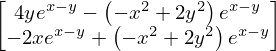

Descent finished, at point: Matrix([[-1.97623271798963], [-3.96569690543399]])
The function has a maximum.


In [12]:
start_point = Matrix([-1, -1])
gradient_descent(example_func_1, start_point, minimize=False)

For the example 2 :

Starting gradient descent for:


Settings: alpha=0.02, epsilon=0.001, iterations=3000
Mode: minimize


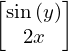

Gradient small enough, terminating at iteration 347
Descent finished, at point: Matrix([[0.000968939941592121], [1.35337794065227e-6]])
The function has a minimum.


In [13]:
start_point = Matrix([1, 2])
gradient_descent(example_func_2, start_point, minimize=True)